<h1>KNN</h1>

<h2>Data challenge</h2>
<a>https://challengedata.ens.fr/participants/challenges/15/</a>

<h3>helpful sites </h3>

In [ ]:
#https://realpython.com/knn-python/
#https://www.jacobsoft.com.mx/es_mx/k-nearest-neighbors/

In [211]:
import pandas as pd

In [212]:
df_raw_train_input = pd.read_csv('./KNN/train_input_2yaM34J.csv')

In [213]:
df_raw_train_input.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0
1,1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0
2,2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0
3,3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0
4,4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0


In [214]:
df_raw_test_input = pd.read_csv('./KNN/test_input_8Vm9H5A.csv')

In [215]:
df_raw_test_input.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,8000,2018-02-18 20:00:00,20.1,26.0,17.9,377.0,1.0
1,8001,2018-02-18 20:30:00,20.2,26.0,18.0,374.0,1.0
2,8002,2018-02-18 21:00:00,20.1,26.0,17.9,379.0,1.0
3,8003,2018-02-18 21:30:00,20.1,26.0,17.9,380.0,1.0
4,8004,2018-02-18 22:00:00,20.0,26.0,17.8,379.0,1.0


In [216]:
df_raw_train_output = pd.read_csv('./KNN/train_output_2kCtjpF.csv')

<h3>Target</h3>

In [217]:
df_raw_train_output.head()

,ID,Score
0,0,4.0
1,1,4.0
2,2,4.0
3,3,2.0
4,4,3.0


<h3>Feature scaling</h3>

In [218]:
def min_max_std(val:float, val_max:float, val_min:float)-> float:
    return (val - val_min) / (val_max - val_min)

In [219]:
vr_min = df_raw_train_input["Temperature"].min()
vr_max = df_raw_train_input["Temperature"].max()

df_train_input_std = df_raw_train_input.copy()
df_train_input_std["Temperature"] = df_train_input_std["Temperature"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["Humidity"].min()
vr_max = df_raw_train_input["Humidity"].max()
df_train_input_std["Humidity"] = df_train_input_std["Humidity"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["Humex"].min()
vr_max = df_raw_train_input["Humex"].max()
df_train_input_std["Humex"] = df_train_input_std["Humex"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["CO2"].min()
vr_max = df_raw_train_input["CO2"].max()
df_train_input_std["CO2"] = df_train_input_std["CO2"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["Bright"].min()
vr_max = df_raw_train_input["Bright"].max()
df_train_input_std["Bright"] = df_train_input_std["Bright"].map(lambda a: min_max_std(a,vr_max,vr_min))

<p>Join features + target</p>

In [220]:
df_train_input_std = pd.merge(df_train_input_std,df_raw_train_output, on="ID")

In [221]:
df_train_input_std["Score"] = df_train_input_std["Score"].astype(int)

<p>Then I found about StandardScaler</p>

In [222]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

<h3>Basic Metrics</h3>

In [223]:
import matplotlib.pyplot as plt

In [224]:
df_train_input_std["Score"].unique()

array([4, 2, 3, 5, 1])

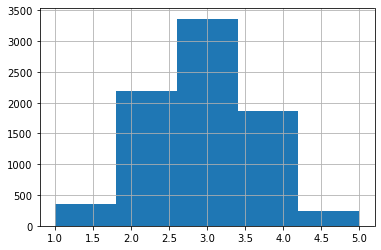

In [225]:
df_train_input_std["Score"].hist(bins=5)
plt.show()

In [226]:
correlation_matrix  = df_train_input_std[["Temperature","Humidity","Humex","CO2","Bright","Score"]].corr()
correlation_matrix["Score"]

Temperature    0.028900
Humidity       0.541904
Humex          0.287406
CO2           -0.172919
Bright        -0.024523
Score          1.000000
Name: Score, dtype: float64

In [227]:
X = df_train_input_std[["Temperature","Humidity","Humex","CO2","Bright"]].values
Y = df_train_input_std["Score"].values

<h2>Training Model</h2>

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [230]:
def model_error(y_train, train_preds, y_test, test_preds):
    cnt_error = 0
    for i in range(len(y_train)):
        if not y_train[i] == train_preds[i]:
            cnt_error += 1

    error_train = (cnt_error / len(y_train)) * 100 
    
    cnt_error = 0
    for i in range(len(y_test)):
        if not y_test[i] == test_preds[i]:
            cnt_error += 1

    error_test = (cnt_error / len(y_test)) * 100  
    
    return { 'error_train':error_train, 'error_test':error_test }

In [231]:
from sklearn.neighbors import KNeighborsClassifier

In [232]:
for n in range(1,20):    
    classifier = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    train_preds = classifier.predict(X_train)
    test_preds = classifier.predict(X_test)
    dic_errores = model_error(y_train, train_preds, y_test, test_preds)
    print(dic_errores)

{'error_train': 0.5833333333333334, 'error_test': 42.9}
{'error_train': 21.65, 'error_test': 42.449999999999996}
{'error_train': 22.733333333333334, 'error_test': 37.3}
{'error_train': 24.516666666666666, 'error_test': 33.2}
{'error_train': 25.25, 'error_test': 32.75}
{'error_train': 25.966666666666665, 'error_test': 31.8}
{'error_train': 26.116666666666667, 'error_test': 30.9}
{'error_train': 26.6, 'error_test': 30.85}
{'error_train': 26.766666666666666, 'error_test': 29.799999999999997}
{'error_train': 27.200000000000003, 'error_test': 29.65}
{'error_train': 27.266666666666666, 'error_test': 29.049999999999997}
{'error_train': 27.416666666666668, 'error_test': 29.15}
{'error_train': 27.6, 'error_test': 28.799999999999997}
{'error_train': 27.750000000000004, 'error_test': 28.999999999999996}
{'error_train': 27.85, 'error_test': 28.549999999999997}
{'error_train': 28.000000000000004, 'error_test': 28.999999999999996}
{'error_train': 28.166666666666668, 'error_test': 28.65}
{'error_trai

<h2>Getting the best parameters with Grid Search</h2>

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
parameters = {'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance']}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [235]:
gridsearch.best_params_

{'n_neighbors': 24, 'weights': 'uniform'}

In [236]:
classifier = KNeighborsClassifier(n_neighbors = 24, weights = 'uniform' )
classifier.fit(X_train, y_train)
train_preds = classifier.predict(X_train)
test_preds = classifier.predict(X_test)
dic_errores = model_error(y_train, train_preds, y_test, test_preds)
print(dic_errores)

{'error_train': 28.599999999999998, 'error_test': 28.499999999999996}


<h2>Visual Validation</h2>

<b>x = Humidity, y= Humex. Two features more correlated to Target</b>

In [237]:
import seaborn as sns

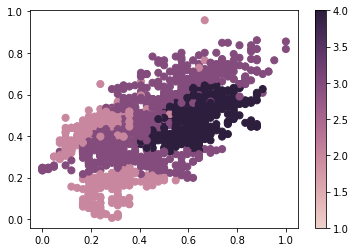

In [238]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 1], X_test[:, 2], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

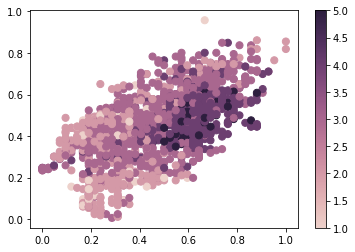

In [239]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 1], X_test[:, 2], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()